# Primer - nanostat

Podatki so v mapi `C:\Users\anad\Documents\Python_tecaj\python_course\nanostat\data`. Želiš prebrati datoteke in iz njih izluščiti posamezne vrenosti, da lahko z njimi naprej računaš statistiko.

### Najprej poskusi na eni datoteki

In [25]:
import pandas as pd
import os
import fnmatch

In [5]:
path="./data/CFBP_1719.txt"
with open(path, "r") as test_file:
    data=test_file.readlines()
    
data

['General summary:         \n',
 'Mean read length:              3,434.6\n',
 'Mean read quality:                12.5\n',
 'Median read length:            1,943.0\n',
 'Median read quality:              12.6\n',
 'Number of reads:               1,725.0\n',
 'Read length N50:               6,773.0\n',
 'STDEV read length:             4,219.5\n',
 'Total bases:               5,924,628.0\n',
 'Number, percentage and megabases of reads above quality cutoffs\n',
 '>Q5:\t1725 (100.0%) 5.9Mb\n',
 '>Q7:\t1725 (100.0%) 5.9Mb\n',
 '>Q10:\t1568 (90.9%) 5.4Mb\n',
 '>Q12:\t1080 (62.6%) 3.9Mb\n',
 '>Q15:\t96 (5.6%) 0.2Mb\n',
 'Top 5 highest mean basecall quality scores and their read lengths\n',
 '1:\t19.7 (270)\n',
 '2:\t19.6 (242)\n',
 '3:\t18.6 (145)\n',
 '4:\t18.0 (432)\n',
 '5:\t17.9 (296)\n',
 'Top 5 longest reads and their mean basecall quality score\n',
 '1:\t36198 (10.3)\n',
 '2:\t35371 (11.6)\n',
 '3:\t29367 (9.7)\n',
 '4:\t28874 (13.1)\n',
 '5:\t27986 (13.1)\n']

Elemente shranimo v novo spremenljivko oblike slovar (dictionary):

In [11]:
def parse_line(line:str)->float:
    line_splitted=line.strip().split()
    number=line_splitted[-1].replace(",","")
    return(float(number))
    
def parse_general_summary(data: list[str])->dict:
    results={}
    for line in data:
        if "Mean read length:" in line:
            results["mean_rl"]=parse_line(line)
        elif "Mean read quality:" in line:
            results["mean_rq"]=parse_line(line)
        elif "Median read length:" in line:
            results["median_rl"]=parse_line(line)
        elif "Median read quality:" in line:
            results["median_rq"]=parse_line(line)
        elif "Number of reads:" in line:
            results["n_reads"]=parse_line(line)
        elif "Read length N50:" in line:
            results["rl_N50"]=parse_line(line)
        elif "STDEV read length:" in line:
            results["STDEV_rl"]=parse_line(line)
        elif "Total bases:" in line:
            results["total_bases"]=parse_line(line)
            
    return(results)     

general_summary=parse_general_summary(data)
print(general_summary)

{'mean_rl': 3434.6, 'mean_rq': 12.5, 'median_rl': 1943.0, 'median_rq': 12.6, 'n_reads': 1725.0, 'rl_N50': 6773.0, 'STDEV_rl': 4219.5, 'total_bases': 5924628.0}


In [17]:
# Pretvoriš dictionary v pandas.df
clean_data=pd.DataFrame.from_dict([general_summary])
clean_data

,mean_rl,mean_rq,median_rl,median_rq,n_reads,rl_N50,STDEV_rl,total_bases
0,3434.6,12.5,1943.0,12.6,1725.0,6773.0,4219.5,5924628.0


### Poskusi z vsemi datotekami

In [29]:
def get_absolute_file_paths(folder_name: str, filter: str = "*") -> list[str]:
    """Reads names of files in a folder and returns a list of files."""
    # filter default: * - all files (defined in function arguments)
    absolute_paths = []
    for dirpath, _, filenames in os.walk(folder_name):
        for filename in filenames:
            if fnmatch.fnmatch(filename, filter):
                absolute_path = os.path.abspath(os.path.join(dirpath, filename))
                absolute_paths.append(absolute_path)
    return absolute_paths

In [32]:
file_paths=get_absolute_file_paths("data")
general_summary_clean_data_list=[]
file_names_index=[]

for path in file_paths:
    file_name=os.path.basename(path)
    file_names_index.append(file_name)
    with open(path, "r") as test_file:
        data=test_file.readlines()
        general_summary=parse_general_summary(data)
        general_summary_clean_data_list.append(general_summary)

clean_data=pd.DataFrame.from_dict(general_summary_clean_data_list)
clean_data

,mean_rl,mean_rq,median_rl,median_rq,n_reads,rl_N50,STDEV_rl,total_bases
0,3434.6,12.5,1943.0,12.6,1725.0,6773.0,4219.5,5924628.0
1,3838.9,12.6,2465.0,12.8,1245.0,7062.0,4343.6,4779463.0
2,8141.9,13.2,4968.0,13.4,1681.0,15409.0,9368.7,13686597.0
3,4561.4,12.4,2988.0,12.5,2893.0,8476.0,5012.0,13196187.0
4,6394.6,12.9,4065.0,13.0,12895.0,11739.0,7396.4,82458084.0
5,7979.2,12.9,4155.0,13.0,14327.0,17926.0,10603.5,114318078.0
6,7372.6,12.5,4498.5,12.6,10314.0,13871.0,8034.5,76041040.0
7,6612.1,12.5,4039.0,12.6,13054.0,12859.0,7633.7,86314616.0
8,6165.7,12.7,3810.5,12.7,26236.0,10078.0,7401.5,161763592.0
9,6366.0,12.7,3621.5,12.7,17076.0,11346.0,8202.1,108705615.0


In [33]:
# Dodaš še imena datotek namesto indeksov (0, 1, 2, ...):
clean_data=pd.DataFrame(general_summary_clean_data_list, index=file_names_index)
clean_data

,mean_rl,mean_rq,median_rl,median_rq,n_reads,rl_N50,STDEV_rl,total_bases
CFBP_1719.txt,3434.6,12.5,1943.0,12.6,1725.0,6773.0,4219.5,5924628.0
CFBP_2502.txt,3838.9,12.6,2465.0,12.8,1245.0,7062.0,4343.6,4779463.0
CFBP_3157_ONT_merged.txt,8141.9,13.2,4968.0,13.4,1681.0,15409.0,9368.7,13686597.0
CFBP_3395.txt,4561.4,12.4,2988.0,12.5,2893.0,8476.0,5012.0,13196187.0
CFBP_3445_ONT_merged.txt,6394.6,12.9,4065.0,13.0,12895.0,11739.0,7396.4,82458084.0
NCPPB_3253_ONT_merged.txt,7979.2,12.9,4155.0,13.0,14327.0,17926.0,10603.5,114318078.0
NIB_Z_2806.txt,7372.6,12.5,4498.5,12.6,10314.0,13871.0,8034.5,76041040.0
NIB_Z_2809.txt,6612.1,12.5,4039.0,12.6,13054.0,12859.0,7633.7,86314616.0
NIB_Z_3057.txt,6165.7,12.7,3810.5,12.7,26236.0,10078.0,7401.5,161763592.0
NIB_Z_3516.txt,6366.0,12.7,3621.5,12.7,17076.0,11346.0,8202.1,108705615.0


### Statistika in export

In [37]:
# statistika
clean_data["mean_rl"].mean()

6259.1

In [38]:
clean_data.describe()

,mean_rl,mean_rq,median_rl,median_rq,n_reads,rl_N50,STDEV_rl,total_bases
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01
mean,6259.100000,12.690909,3712.318182,12.790909,10324.363636,11980.090909,7449.836364,6.945086e+07
std,1661.210766,0.234327,904.170484,0.258668,7863.799034,3705.149834,2140.389023,5.273640e+07
min,3434.600000,12.400000,1943.000000,12.500000,1245.000000,6773.000000,4219.500000,4.779463e+06
25%,5363.550000,12.500000,3304.750000,12.600000,2309.000000,9277.000000,6204.200000,1.344139e+07
50%,6394.600000,12.700000,4039.000000,12.700000,12122.000000,11739.000000,7633.700000,8.245808e+07
75%,7675.900000,12.800000,4218.500000,12.900000,13690.500000,14640.000000,8785.400000,1.027386e+08
max,8141.900000,13.200000,4968.000000,13.400000,26236.000000,17926.000000,10603.500000,1.617636e+08


<Axes: >

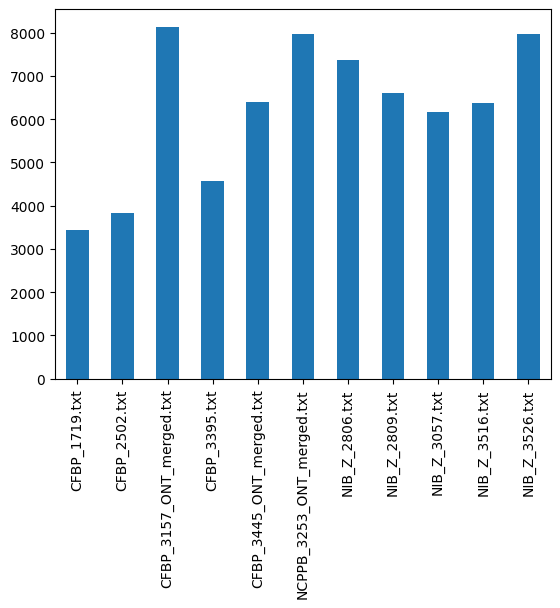

In [41]:
clean_data["mean_rl"].plot(kind="bar")

Dostop do podatkov v Pandas. Priporoča se `df["col"]`, ker je krajši kot `df.loc["col"]`, `df.col` pa lahko povzroča probleme, če so v imenu presledki ipd.

In [43]:
clean_data.loc[:,"mean_rl"].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of CFBP_1719.txt                3434.6
CFBP_2502.txt                3838.9
CFBP_3157_ONT_merged.txt     8141.9
CFBP_3395.txt                4561.4
CFBP_3445_ONT_merged.txt     6394.6
NCPPB_3253_ONT_merged.txt    7979.2
NIB_Z_2806.txt               7372.6
NIB_Z_2809.txt               6612.1
NIB_Z_3057.txt               6165.7
NIB_Z_3516.txt               6366.0
NIB_Z_3526.txt               7983.1
Name: mean_rl, dtype: float64>

In [44]:
clean_data["mean_rl"].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of CFBP_1719.txt                3434.6
CFBP_2502.txt                3838.9
CFBP_3157_ONT_merged.txt     8141.9
CFBP_3395.txt                4561.4
CFBP_3445_ONT_merged.txt     6394.6
NCPPB_3253_ONT_merged.txt    7979.2
NIB_Z_2806.txt               7372.6
NIB_Z_2809.txt               6612.1
NIB_Z_3057.txt               6165.7
NIB_Z_3516.txt               6366.0
NIB_Z_3526.txt               7983.1
Name: mean_rl, dtype: float64>

In [45]:
clean_data.mean_rl.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of CFBP_1719.txt                3434.6
CFBP_2502.txt                3838.9
CFBP_3157_ONT_merged.txt     8141.9
CFBP_3395.txt                4561.4
CFBP_3445_ONT_merged.txt     6394.6
NCPPB_3253_ONT_merged.txt    7979.2
NIB_Z_2806.txt               7372.6
NIB_Z_2809.txt               6612.1
NIB_Z_3057.txt               6165.7
NIB_Z_3516.txt               6366.0
NIB_Z_3526.txt               7983.1
Name: mean_rl, dtype: float64>

Izvoz podatkov

In [34]:
clean_data.to_csv("general_summary.csv")

In [39]:
clean_data.to_excel("general_summary.xlsx")